In [1]:
import pandas as pd

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)

## Loading the Data Set

In [3]:
diabetes_data = pd.read_csv("diabetes.csv")


Univariate Analysis
### Describing Data ###


In [25]:
## Summary of Data ##
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
## Have a close Look 
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
diabetes_data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


### Hypothesis

* DiabetesPedigreeFunction is directly proportional to Outcome 1
* High Glucose, Lower Insulin, Outcome is mostly 1
* 

### Visualizing relations among the Columns 

C:\ProgramData\Anaconda2\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


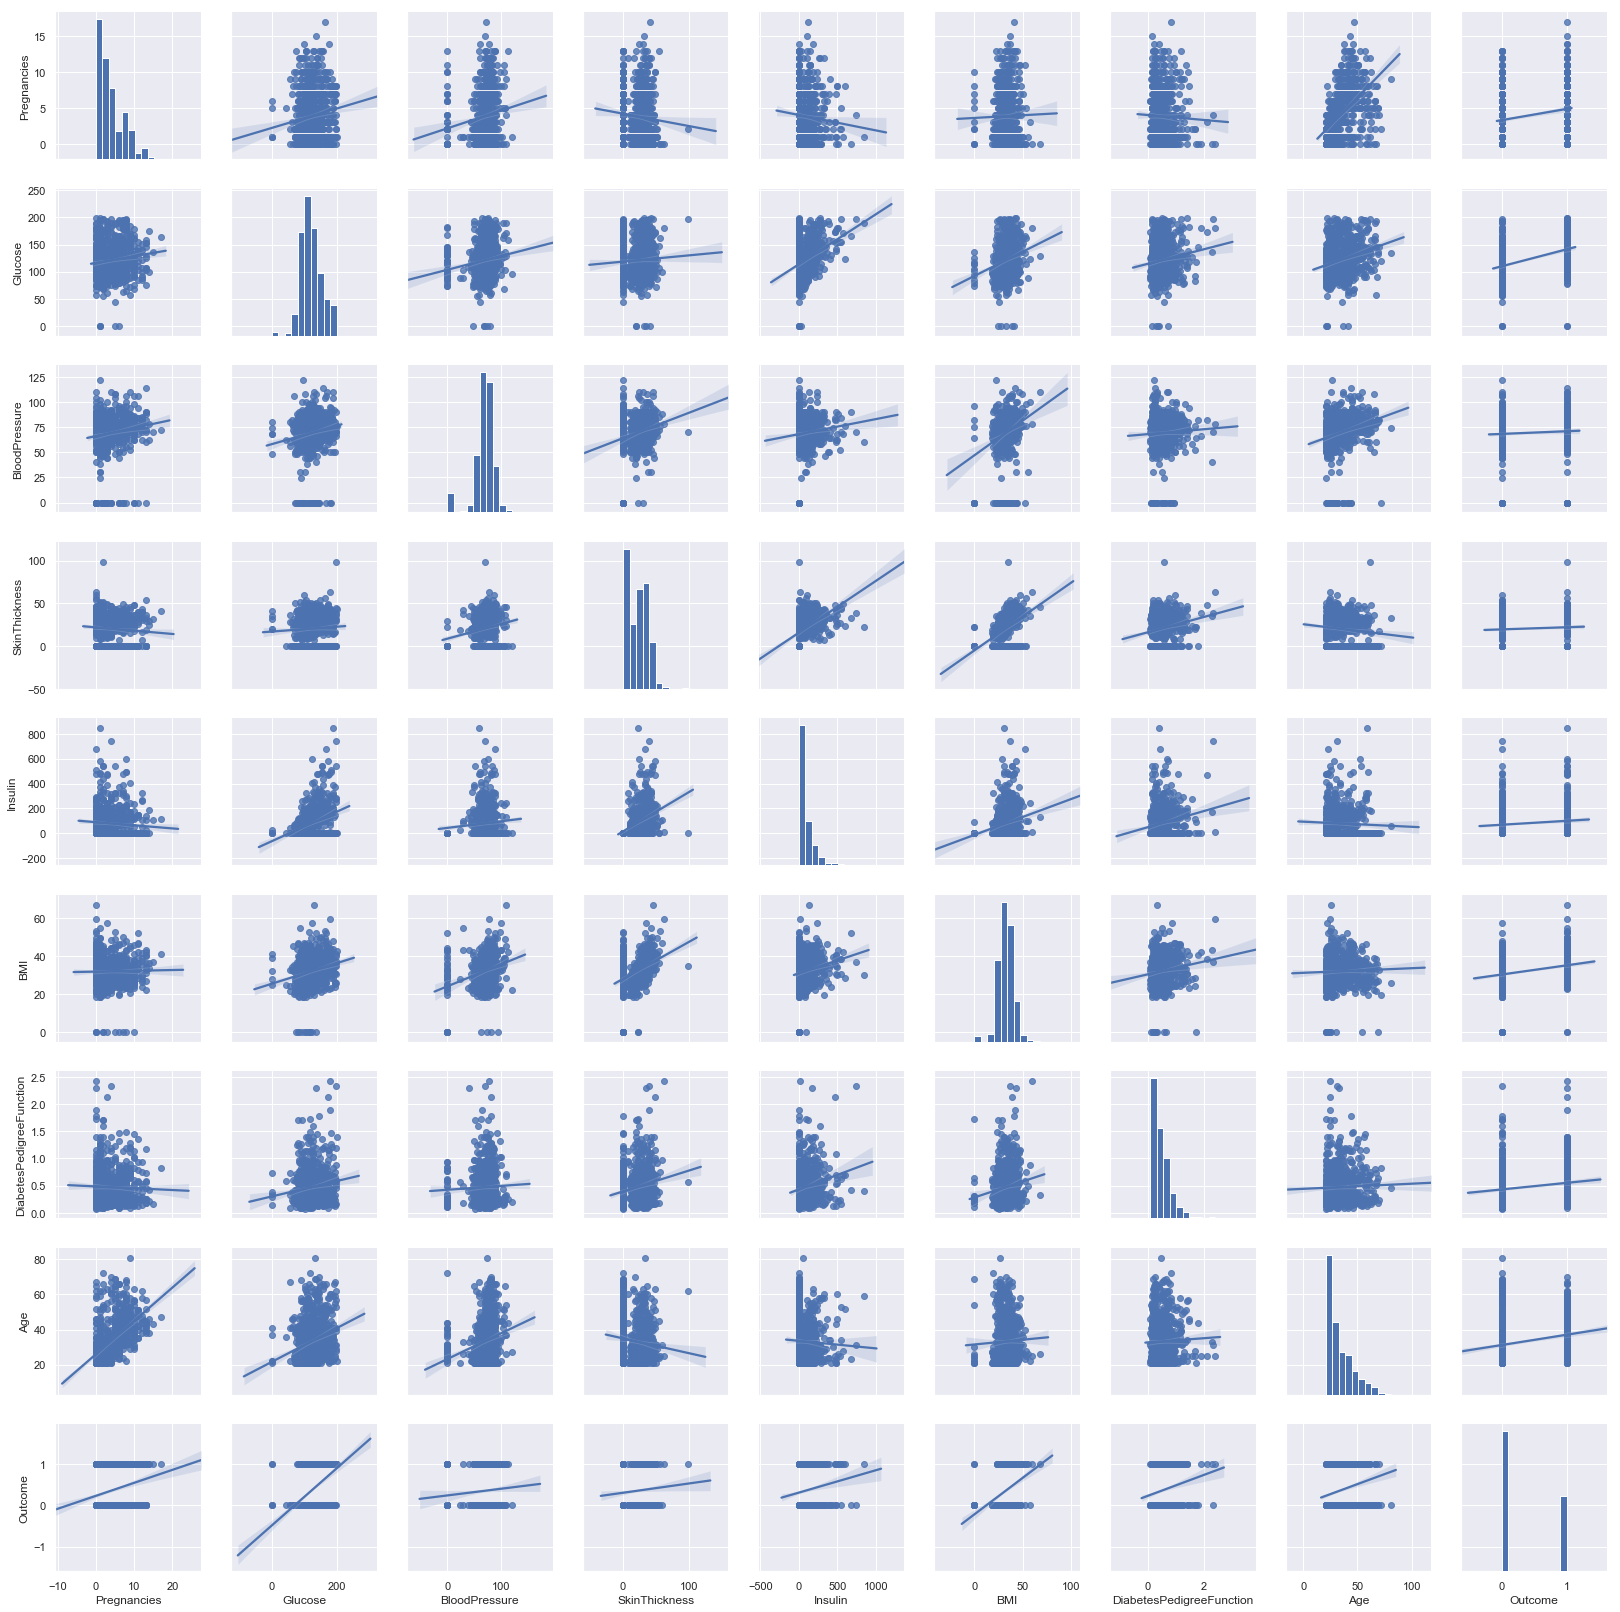

In [7]:
sns.pairplot(diabetes_data[diabetes_data.columns], kind='reg')
plt.show()

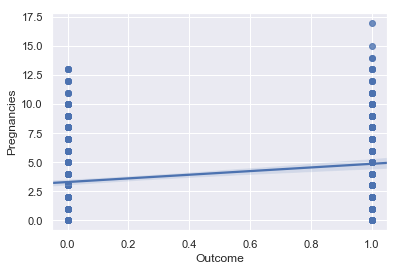

In [8]:
sns.regplot(x='Outcome', y='Pregnancies', data=diabetes_data)
plt.show()

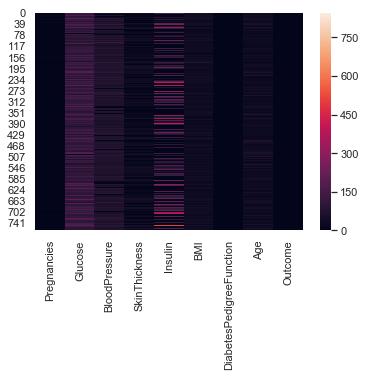

In [9]:
sns.heatmap(diabetes_data)
plt.show()

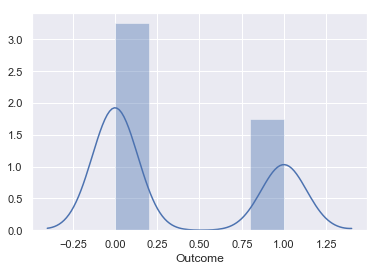

In [10]:
sns.distplot(diabetes_data['Outcome'])
plt.show()

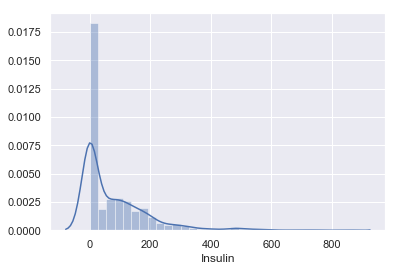

In [11]:
sns.distplot(diabetes_data['Insulin'])
plt.show()

### Understanding relation between Glucose, Insulin


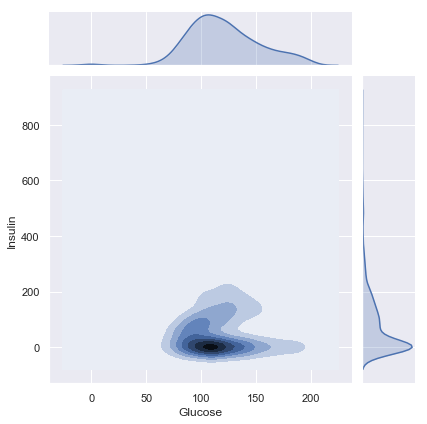

In [12]:
sns.jointplot(diabetes_data["Glucose"], diabetes_data["Insulin"], kind='kde')
plt.show()

### Relating Glucose , Insulin and Outcome

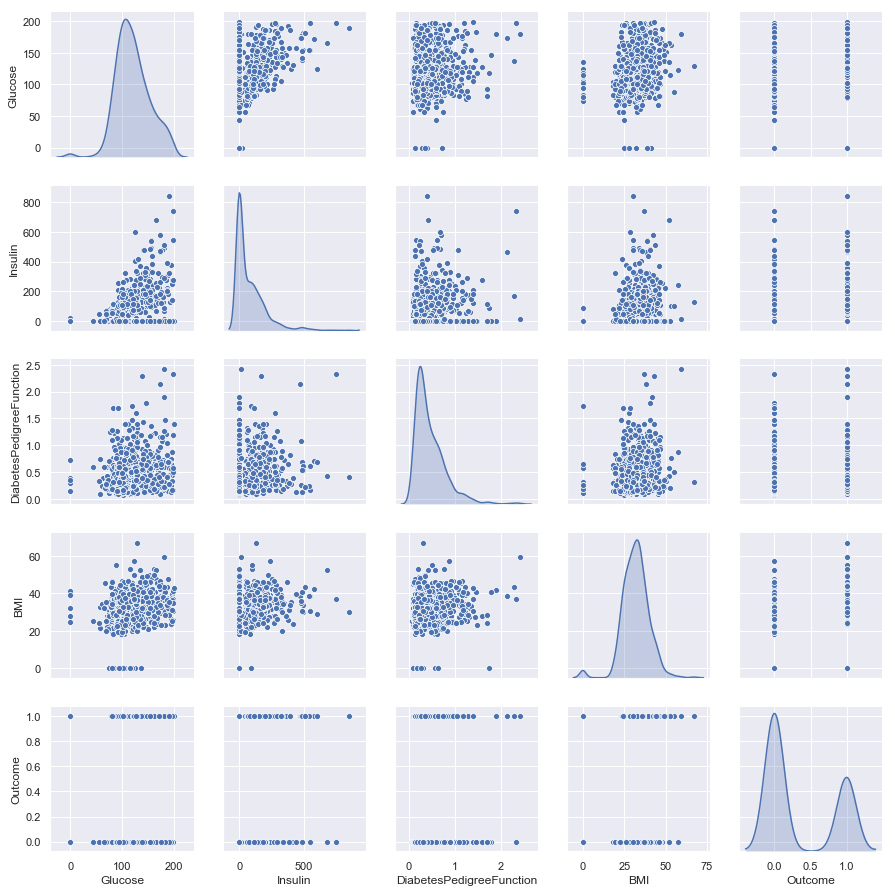

In [13]:
sns.pairplot(diabetes_data[['Glucose', 'Insulin', 'DiabetesPedigreeFunction', 'BMI','Outcome']], diag_kind='kde')
plt.show()

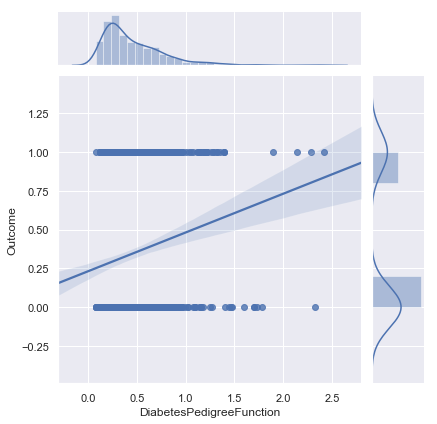

In [14]:
sns.jointplot(diabetes_data["DiabetesPedigreeFunction"], diabetes_data["Outcome"], kind='reg')
plt.show()

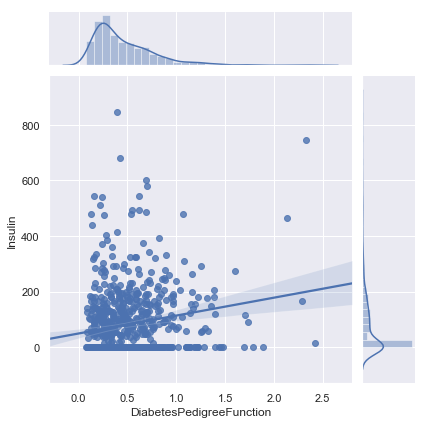

In [15]:
sns.jointplot(diabetes_data["DiabetesPedigreeFunction"], diabetes_data["Insulin"], kind='reg')
plt.show()

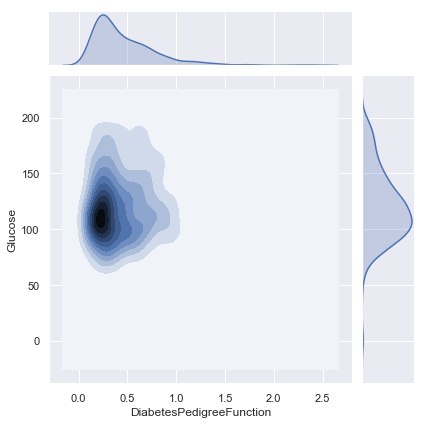

In [16]:
sns.jointplot(diabetes_data["DiabetesPedigreeFunction"], diabetes_data["Glucose"], kind='kde')
plt.show()

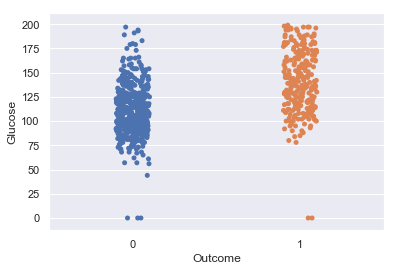

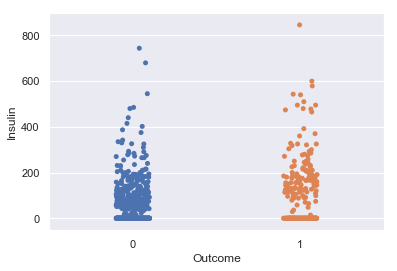

In [17]:
sns.stripplot(diabetes_data['Outcome'], diabetes_data["Glucose"], jitter=True)
plt.show()

sns.stripplot(diabetes_data['Outcome'], diabetes_data["Insulin"], jitter=True)
plt.show()

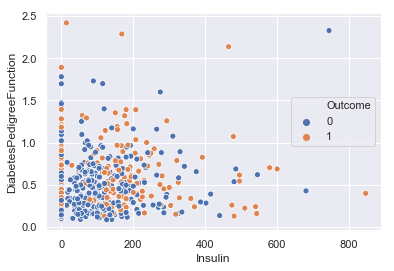

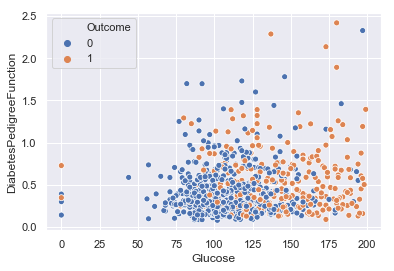

In [42]:
sns.scatterplot(x=diabetes_data["Insulin"], y=diabetes_data['DiabetesPedigreeFunction'], data=diabetes_data, hue=diabetes_data['Outcome'])
plt.show()

sns.scatterplot(x=diabetes_data["Glucose"], y=diabetes_data['DiabetesPedigreeFunction'], data=diabetes_data, hue=diabetes_data['Outcome'])
plt.show()

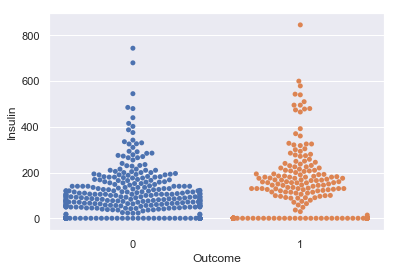

In [19]:
sns.swarmplot(y=diabetes_data['Insulin'], x=diabetes_data['Outcome'] , data=diabetes_data)
plt.show()

### Box plot 

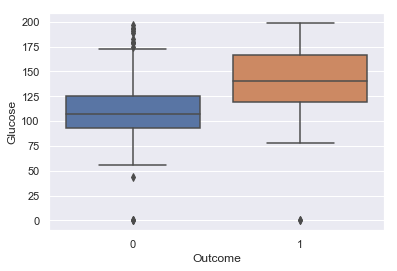

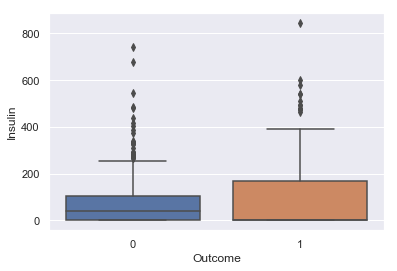

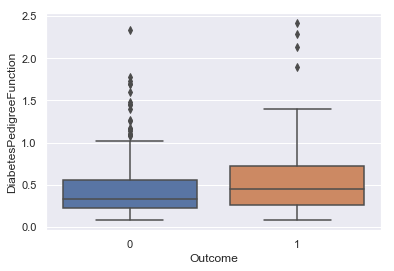

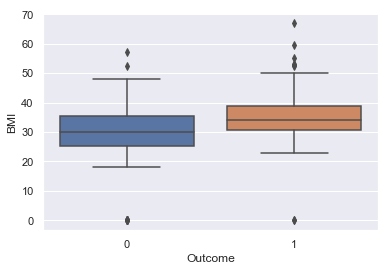

In [20]:
sns.boxplot(diabetes_data['Outcome'], diabetes_data["Glucose"])
plt.show()

sns.boxplot(diabetes_data['Outcome'], diabetes_data["Insulin"])
plt.show()

sns.boxplot(diabetes_data['Outcome'], diabetes_data["DiabetesPedigreeFunction"])
plt.show()

sns.boxplot(diabetes_data['Outcome'], diabetes_data["BMI"])
plt.show()


### Count Plot 

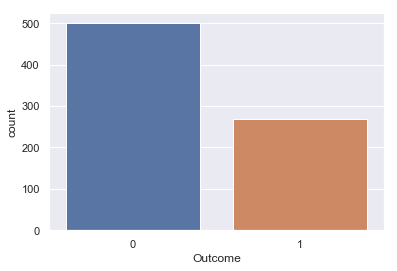

In [21]:
sns.countplot(diabetes_data['Outcome'])
plt.show()

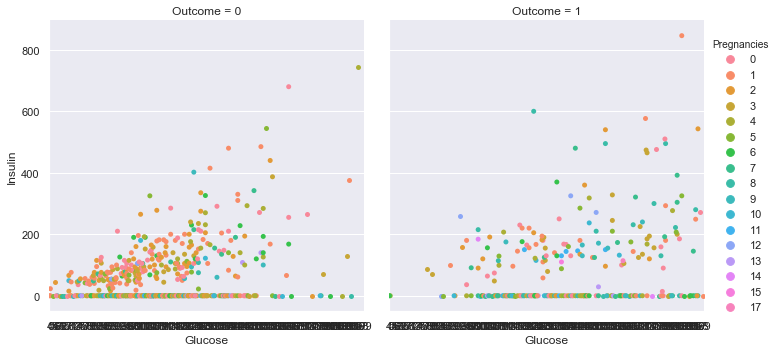

In [22]:
sns.catplot(x="Glucose",
              y="Insulin",
              hue="Pregnancies",
              col="Outcome",
              data=diabetes_data,
              kind="swarm") 
plt.show()

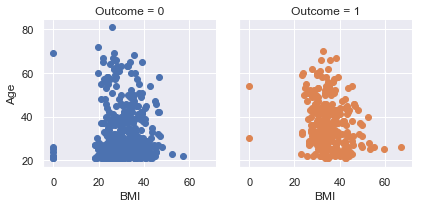

In [23]:
# Facet Grid
fg = sns.FacetGrid(diabetes_data, col="Outcome", hue='Outcome')

fg.map(plt.scatter, "BMI", "Age")
plt.show()

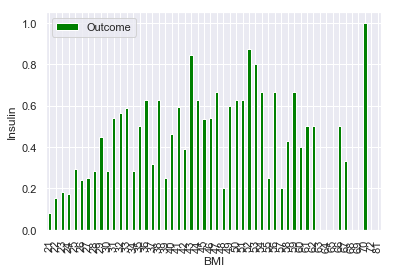

In [38]:
import numpy as np
dp = diabetes_data.pivot_table(index ='Age',values = 'Outcome', aggfunc=np.mean)
dp.plot(kind = 'bar',color = 'green')
plt.xlabel('BMI')
plt.ylabel('Insulin')
plt.show()